In [3]:
# Importar la librería pandas
import pandas as pd

# Especifica la ruta completa del archivo
ruta_archivo = r'C:\Users\jdvil\Documents\Python\NAACL\Task_9\starting_k\incidents_labelled.csv'

# Leer el archivo CSV
carga = pd.read_csv(ruta_archivo, encoding='ISO-8859-15')

# Mostrar las primeras filas del DataFrame
carga.head()

,Unnamed: 0,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


In [4]:
carga.count()

Unnamed: 0          5984
year                5984
month               5984
day                 5984
country             5984
title               5984
text                5984
hazard-category     5984
product-category    5984
hazard              5984
product             5984
dtype: int64

In [5]:
df = carga

In [6]:
# Revisar datos faltantes en cada columna
missing_data = df.isnull().sum()
print("Datos faltantes por columna:")
print(missing_data)

Datos faltantes por columna:
Unnamed: 0          0
year                0
month               0
day                 0
country             0
title               0
text                0
hazard-category     0
product-category    0
hazard              0
product             0
dtype: int64


In [7]:
import re
from collections import Counter

# Definir función para extraer caracteres especiales
def extract_special_characters(column):
    special_characters = re.findall(r'[^a-zA-Z0-9\s]', ''.join(column))
    return Counter(special_characters)

# Obtener caracteres especiales y su concurrencia en las columnas 'title' y 'text'
special_characters_title = extract_special_characters(df['title'].astype(str))
special_characters_text = extract_special_characters(df['text'].astype(str))

print("Caracteres especiales en la columna 'title':")
print(special_characters_title)

print("\nCaracteres especiales en la columna 'text':")
print(special_characters_text)

Caracteres especiales en la columna 'title':
Counter({',': 1752, '-': 1581, 'â': 1561, '\x80': 1559, '.': 1551, 'Ã': 840, '\x94': 732, ')': 558, '(': 555, '&': 484, "'": 390, 'Œ': 339, '\x99': 319, ':': 258, '"': 220, '€': 219, 'Â': 189, '\x93': 186, '\x9c': 161, '/': 130, 'Î': 122, '®': 111, '¶': 84, '\x9e': 79, '%': 73, ';': 71, '_': 67, '©': 60, '\x9d': 60, 'Ï': 56, '\x9f': 49, '\x84': 28, '\x98': 27, '!': 25, '±': 20, '*': 18, '·': 18, '#': 17, '+': 17, 'œ': 17, '\x96': 17, 'š': 15, '\x90': 14, '¢': 13, 'º': 13, '\x83': 12, '¹': 12, '»': 11, '¬': 10, '\x89': 9, 'µ': 9, '\x81': 8, 'Ä': 7, '¿': 7, 'Ž': 6, '\xad': 6, '?': 5, '\x87': 5, '\x82': 4, '\x8d': 4, '³': 4, 'ï': 3, '[': 3, ']': 3, '¡': 3, '\x95': 3, '\x86': 3, '²': 3, '\x92': 3, 'Å': 3, '\x88': 2, '$': 2, '`': 2, '«': 2, '\x8e': 1, '\x9a': 1, '=': 1, 'Š': 1, '¥': 1, '\x91': 1, '¯': 1, 'ª': 1})

Caracteres especiales en la columna 'text':
Counter({'.': 110016, ',': 85700, '-': 53594, '/': 46697, '>': 42189, '<': 42171, ':': 350

In [8]:
import re

# Función para limpiar texto ignorando errores de codificación
def clean_text(text):
    # Intentar decodificar correctamente con UTF-8, ignorando errores
    try:
        # Encode the text to bytes, then decode using utf-8
        text = text.encode('latin1', errors='ignore').decode('utf-8', errors='ignore')
    except (UnicodeDecodeError, AttributeError):
        pass
    # Remover cualquier otro carácter especial no ASCII
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Aplicar la limpieza a las columnas 'title' y 'text'
df['title_clean'] = df['title'].apply(clean_text)
df['text_clean'] = df['text'].apply(clean_text)

# Mostrar las primeras filas de las columnas limpiadas
df[['title_clean', 'text_clean']].head()

,title_clean,text_clean
0,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...
1,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...
2,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...
3,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...
4,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...


In [9]:
import re
from collections import Counter

# Función para extraer caracteres especiales
def extract_special_characters(column):
    special_characters = re.findall(r'[^a-zA-Z0-9\s]', ''.join(column))
    return Counter(special_characters)

# Revisar nuevamente los caracteres especiales en las columnas limpiadas 'title_clean' y 'text_clean'
special_characters_title_clean = extract_special_characters(df['title_clean'].astype(str))
special_characters_text_clean = extract_special_characters(df['text_clean'].astype(str))

# Mostrar los resultados
print("Caracteres especiales en la columna 'title_clean':")
print(special_characters_title_clean)

print("\nCaracteres especiales en la columna 'text_clean':")
print(special_characters_text_clean)

Caracteres especiales en la columna 'title_clean':
Counter({',': 1752, '-': 1581, '.': 1551, ')': 558, '(': 555, '&': 484, "'": 390, ':': 258, '"': 220, '/': 130, '%': 73, ';': 71, '_': 67, '!': 25, '*': 18, '#': 17, '+': 17, '?': 5, '[': 3, ']': 3, '$': 2, '`': 2, '=': 1})

Caracteres especiales en la columna 'text_clean':
Counter({'.': 110016, ',': 85700, '-': 53594, '/': 46697, '>': 42189, '<': 42171, ':': 35064, ')': 20102, '(': 20090, '"': 13714, "'": 8989, '&': 4833, '=': 4545, ';': 3614, '?': 2131, '@': 2081, '#': 1870, '[': 749, ']': 743, '%': 659, '*': 358, '_': 333, '!': 212, '+': 180, '$': 79, '|': 39, '~': 16, '`': 9, '\\': 6, '}': 4, '{': 2})


In [10]:
# Eliminar los saltos de línea (\n) en las columnas 'title_clean' y 'text_clean'
df['title_clean'] = df['title_clean'].str.replace('\n', ' ')
df['text_clean'] = df['text_clean'].str.replace('\n', ' ')

# Mostrar las primeras filas para verificar
df[['title_clean', 'text_clean']].head()

,title_clean,text_clean
0,Recall Notification: FSIS-024-94,Case Number: 024-94 Date Opened...
1,Recall Notification: FSIS-033-94,Case Number: 033-94 Date Opened...
2,Recall Notification: FSIS-014-94,Case Number: 014-94 Date Opened...
3,Recall Notification: FSIS-009-94,Case Number: 009-94 Date Opened...
4,Recall Notification: FSIS-001-94,Case Number: 001-94 Date Opened...


In [11]:
df.head()

,Unnamed: 0,year,month,day,country,title,text,hazard-category,product-category,hazard,product,title_clean,text_clean
0,0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage,Recall Notification: FSIS-024-94,Case Number: 024-94 Date Opened...
1,1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage,Recall Notification: FSIS-033-94,Case Number: 033-94 Date Opened...
2,2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices,Recall Notification: FSIS-014-94,Case Number: 014-94 Date Opened...
3,3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat,Recall Notification: FSIS-009-94,Case Number: 009-94 Date Opened...
4,4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast,Recall Notification: FSIS-001-94,Case Number: 001-94 Date Opened...


In [12]:
# Revisar la distribución de las columnas objetivo: hazard-category y product-category
hazard_distribution = df['hazard-category'].value_counts()
product_distribution = df['product-category'].value_counts()

# Mostrar la distribución
print("Distribución de 'hazard-category':")
print(hazard_distribution)

print("\nDistribución de 'product-category':")
print(product_distribution)

Distribución de 'hazard-category':
hazard-category
biological                        2020
allergens                         1955
foreign bodies                     769
chemical                           498
fraud                              411
other hazard                       147
packaging defect                    82
organoleptic aspects                63
food additives and flavourings      26
migration                           13
Name: count, dtype: int64

Distribución de 'product-category':
product-category
meat, egg and dairy products                         1687
cereals and bakery products                           778
fruits and vegetables                                 655
prepared dishes and snacks                            516
nuts, nut products and seeds                          321
soups, broths, sauces and condiments                  302
seafood                                               297
cocoa and cocoa preparations, coffee and tea          245
ices and desser

In [13]:
# Contar cuántos hazard-category únicos tiene cada product-category
product_hazard_mapping = df.groupby('product-category')['hazard-category'].nunique()

# Filtrar los productos que están presentes en más de un hazard-category
products_in_multiple_hazards = product_hazard_mapping[product_hazard_mapping > 1]

# Mostrar los productos con más de un hazard-category
print("Productos presentes en más de un hazard-category:")
print(products_in_multiple_hazards)

# Mostrar el detalle de los productos con sus hazard-category
for product in products_in_multiple_hazards.index:
    print(f"\nProduct: {product}")
    # Filtrar por cada producto para ver las categorías de riesgo asociadas
    hazards_for_product = df[df['product-category'] == product]['hazard-category'].unique()
    print(f"Hazard categories: {hazards_for_product}")

Productos presentes en más de un hazard-category:
product-category
alcoholic beverages                                   8
cereals and bakery products                           9
cocoa and cocoa preparations, coffee and tea          8
confectionery                                         9
dietetic foods, food supplements, fortified foods     8
fats and oils                                         6
feed materials                                        4
food additives and flavourings                        3
food contact materials                                5
fruits and vegetables                                 9
herbs and spices                                      7
honey and royal jelly                                 4
ices and desserts                                     7
meat, egg and dairy products                         10
non-alcoholic beverages                               9
nuts, nut products and seeds                          8
other food product / mixed           

In [14]:
# Contar cuántas veces cada combinación de 'product-category' y 'hazard-category' ocurre
product_hazard_counts = df.groupby(['product-category', 'hazard-category']).size().reset_index(name='count')

# Mostrar el resultado
print(product_hazard_counts)

                         product-category       hazard-category  count
0                     alcoholic beverages             allergens     12
1                     alcoholic beverages            biological      1
2                     alcoholic beverages              chemical      6
3                     alcoholic beverages        foreign bodies     12
4                     alcoholic beverages                 fraud     13
..                                    ...                   ...    ...
144  soups, broths, sauces and condiments  organoleptic aspects      7
145  soups, broths, sauces and condiments          other hazard      5
146  soups, broths, sauces and condiments      packaging defect      6
147                     sugars and syrups             allergens      1
148                     sugars and syrups        foreign bodies      4

[149 rows x 3 columns]


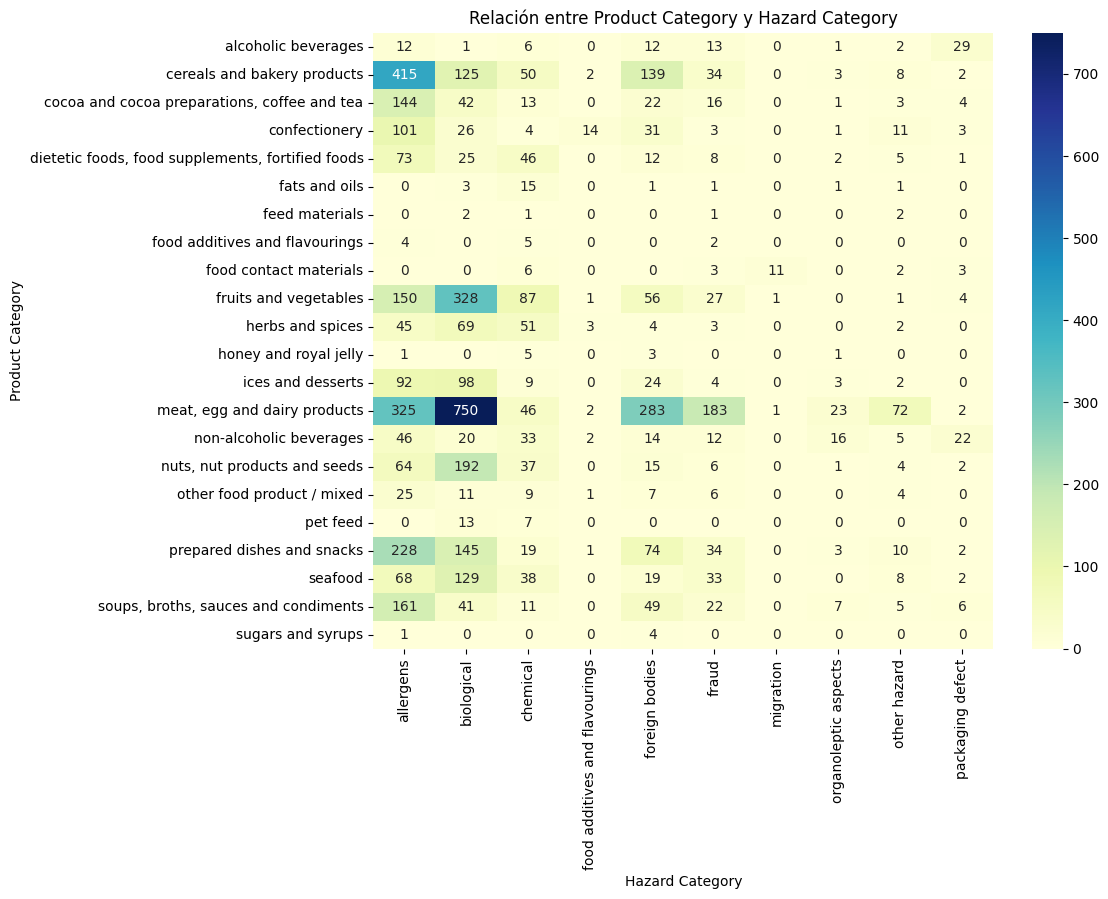

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla pivote para visualizar mejor la relación entre productos y riesgos
pivot_table = df.groupby(['product-category', 'hazard-category']).size().unstack(fill_value=0)

# Crear un heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relación entre Product Category y Hazard Category')
plt.ylabel('Product Category')
plt.xlabel('Hazard Category')
plt.show()

In [16]:
# Obtener los países únicos en la columna 'country'
unique_countries = df['country'].unique()

# Mostrar la lista de países únicos
print("Países únicos en el DataFrame:")
print(unique_countries)

Países únicos en el DataFrame:
['us' 'au' 'ca' 'na' 'hk' 'ie' 'uk' 'sg' 'de' 'gr' 'dk' 'scot' 'lu' 'at'
 'it']


In [17]:
# Agrupar por year, country, y product-category, luego contar los hazard-category únicos
product_hazard_per_location = df.groupby(['year', 'country', 'product-category'])['hazard-category'].nunique().reset_index()

# Filtrar aquellos casos donde un product-category está presente en más de un hazard-category
products_in_multiple_hazards_location = product_hazard_per_location[product_hazard_per_location['hazard-category'] > 1]

# Mostrar los resultados
print("Productos que están presentes en múltiples hazard-category en la misma combinación de año y país:")
print(products_in_multiple_hazards_location)

Productos que están presentes en múltiples hazard-category en la misma combinación de año y país:
     year country                      product-category  hazard-category
0    1994      us          meat, egg and dairy products                3
1    1995      us          meat, egg and dairy products                2
2    1995      us            prepared dishes and snacks                2
3    1996      us          meat, egg and dairy products                2
4    1997      us          meat, egg and dairy products                3
..    ...     ...                                   ...              ...
994  2022      us               non-alcoholic beverages                2
995  2022      us          nuts, nut products and seeds                3
997  2022      us            prepared dishes and snacks                3
998  2022      us                               seafood                5
999  2022      us  soups, broths, sauces and condiments                2

[563 rows x 4 columns]


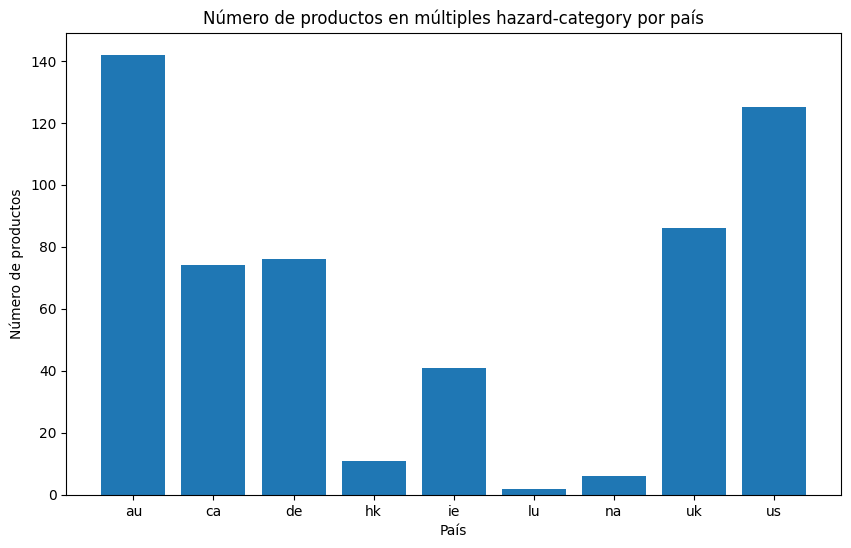

In [18]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras por país
country_summary = products_in_multiple_hazards_location.groupby('country').size().reset_index(name='num_products')

plt.figure(figsize=(10,6))
plt.bar(country_summary['country'], country_summary['num_products'])
plt.title('Número de productos en múltiples hazard-category por país')
plt.xlabel('País')
plt.ylabel('Número de productos')
plt.show()

# Modelo Base

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Suponiendo que tu DataFrame se llama df
# Paso 1: Combinar las columnas 'title_clean' y 'text_clean' en una sola
df['combined_text'] = df['text_clean']

# Paso 2: Codificar las etiquetas
# Codificar 'hazard-category'
le_hazard = LabelEncoder()
df['hazard_encoded'] = le_hazard.fit_transform(df['hazard-category'])

# Codificar 'product-category' dentro de cada 'hazard-category'
# Crear un diccionario para almacenar los codificadores de 'product-category' por 'hazard-category'
product_encoders = {}
df['product_encoded'] = -1  # Inicializar con -1

# Obtener las categorías únicas de 'hazard-category'
hazard_categories = df['hazard-category'].unique()

for hazard in hazard_categories:
    # Filtrar el DataFrame por 'hazard-category'
    mask = df['hazard-category'] == hazard
    # Crear un LabelEncoder para el 'hazard-category' actual
    le_product = LabelEncoder()
    df.loc[mask, 'product_encoded'] = le_product.fit_transform(df.loc[mask, 'product-category'])
    # Almacenar el codificador
    product_encoders[hazard] = le_product

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X = df['combined_text']
y_hazard = df['hazard_encoded']
y_product = df['product_encoded']

X_train, X_test, y_hazard_train, y_hazard_test, y_product_train, y_product_test = train_test_split(
    X, y_hazard, y_product, test_size=0.2, random_state=42, stratify=y_hazard
)

# Paso 4: Crear un Pipeline para el modelo de SVM
from sklearn.base import BaseEstimator, TransformerMixin

# Crear un Pipeline para 'hazard-category'
pipeline_hazard = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

# Entrenar el modelo para 'hazard-category'
pipeline_hazard.fit(X_train, y_hazard_train)

# Predecir en el conjunto de prueba
y_hazard_pred = pipeline_hazard.predict(X_test)

# Paso 5: Evaluar el modelo para 'hazard-category'
print("Evaluación del modelo para 'hazard-category':")
print(classification_report(y_hazard_test, y_hazard_pred, target_names=le_hazard.classes_))
print("Matriz de confusión:")
print(confusion_matrix(y_hazard_test, y_hazard_pred))
print("Accuracy:", accuracy_score(y_hazard_test, y_hazard_pred))
print("F1 Score:", f1_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Precision:", precision_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Recall:", recall_score(y_hazard_test, y_hazard_pred, average='weighted'))

# Paso 6: Para 'product-category', necesitamos tener en cuenta la jerarquía
# Crear un diccionario para almacenar los modelos por 'hazard-category'
product_models = {}

# Entrenar un modelo para cada 'hazard-category'
for hazard in hazard_categories:
    # Filtrar los datos correspondientes
    hazard_idx = le_hazard.transform([hazard])[0]
    mask_train = y_hazard_train == hazard_idx
    # Verificar si hay suficientes muestras para entrenar
    if np.sum(mask_train) > 1:
        X_train_hazard = X_train[mask_train]
        y_product_train_hazard = y_product_train[mask_train]

        # Crear y entrenar el modelo
        pipeline_product = Pipeline([
            ('vectorizer', CountVectorizer()),
            ('classifier', LinearSVC())
        ])
        pipeline_product.fit(X_train_hazard, y_product_train_hazard)
        # Almacenar el modelo
        product_models[hazard] = pipeline_product

# Paso 7: Predecir 'product-category' teniendo en cuenta 'hazard-category'
y_product_pred = []

for i in range(len(X_test)):
    hazard_idx = y_hazard_pred[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]

    # Si tenemos un modelo para este 'hazard-category'
    if hazard_label in product_models:
        model = product_models[hazard_label]
        # Transformar el texto en una lista para el modelo
        X_sample = [X_test.iloc[i]]
        # Predecir 'product-category'
        product_pred_encoded = model.predict(X_sample)[0]
        # Decodificar la predicción
        le_product = product_encoders[hazard_label]
        product_pred_label = le_product.inverse_transform([product_pred_encoded])[0]
        # Añadir a la lista de predicciones
        y_product_pred.append((hazard_label, product_pred_label))
    else:
        # Si no hay modelo, asignar una etiqueta por defecto
        y_product_pred.append((hazard_label, None))

# Paso 8: Evaluar el modelo para 'product-category'
# Necesitamos comparar las predicciones con las etiquetas verdaderas
y_product_true_labels = []
y_product_pred_labels = []

for i in range(len(y_product_test)):
    hazard_idx = y_hazard_test.iloc[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]
    product_idx = y_product_test.iloc[i]
    le_product = product_encoders[hazard_label]
    product_label = le_product.inverse_transform([product_idx])[0]

    y_product_true_labels.append((hazard_label, product_label))

    # Obtener la predicción correspondiente
    pred_hazard_label, pred_product_label = y_product_pred[i]
    y_product_pred_labels.append((pred_hazard_label, pred_product_label))

# Evaluar solo las instancias donde tenemos predicciones válidas
true_labels = []
pred_labels = []

for true, pred in zip(y_product_true_labels, y_product_pred_labels):
    # Si la predicción no es None
    if pred[1] is not None:
        true_labels.append(true[1])
        pred_labels.append(pred[1])

# Reporte de clasificación para 'product-category'
print("\nEvaluación del modelo para 'product-category':")
print(classification_report(true_labels, pred_labels))
print("Matriz de confusión:")
print(confusion_matrix(true_labels, pred_labels))
print("Accuracy:", accuracy_score(true_labels, pred_labels))
print("F1 Score:", f1_score(true_labels, pred_labels, average='weighted'))
print("Precision:", precision_score(true_labels, pred_labels, average='weighted'))
print("Recall:", recall_score(true_labels, pred_labels, average='weighted'))


Evaluación del modelo para 'hazard-category':
                                precision    recall  f1-score   support

                     allergens       0.90      0.95      0.93       391
                    biological       0.97      0.94      0.95       404
                      chemical       0.85      0.85      0.85       100
food additives and flavourings       0.38      0.60      0.46         5
                foreign bodies       0.87      0.92      0.89       154
                         fraud       0.66      0.59      0.62        82
                     migration       0.00      0.00      0.00         3
          organoleptic aspects       0.50      0.15      0.24        13
                  other hazard       0.41      0.38      0.39        29
              packaging defect       0.44      0.50      0.47        16

                      accuracy                           0.88      1197
                     macro avg       0.60      0.59      0.58      1197
                

# Mejorado Jerarquia y nuevos campos

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Paso 1: Combinar las columnas 'title_clean' y 'text_clean' en una sola
df['combined_text'] = df['text_clean']

# Paso 2: Codificar las etiquetas
# Codificar 'hazard-category'
le_hazard = LabelEncoder()
df['hazard_encoded'] = le_hazard.fit_transform(df['hazard-category'])

# Codificar 'product-category' dentro de cada 'hazard-category'
# Crear un diccionario para almacenar los codificadores de 'product-category' por 'hazard-category'
product_encoders = {}
df['product_encoded'] = -1  # Inicializar con -1

# Obtener las categorías únicas de 'hazard-category'
hazard_categories = df['hazard-category'].unique()

for hazard in hazard_categories:
    # Filtrar el DataFrame por 'hazard-category'
    mask = df['hazard-category'] == hazard
    # Crear un LabelEncoder para el 'hazard-category' actual
    le_product = LabelEncoder()
    df.loc[mask, 'product_encoded'] = le_product.fit_transform(df.loc[mask, 'product-category'])
    # Almacenar el codificador
    product_encoders[hazard] = le_product

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X = df['combined_text']
y_hazard = df['hazard_encoded']
y_product = df['product_encoded']

X_train, X_test, y_hazard_train, y_hazard_test, y_product_train, y_product_test = train_test_split(
    X, y_hazard, y_product, test_size=0.2, random_state=42, stratify=y_hazard
)

# Paso 4: Crear un Pipeline para el modelo de SVM
from sklearn.base import BaseEstimator, TransformerMixin

# Crear un Pipeline para 'hazard-category'
pipeline_hazard = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
])

# Entrenar el modelo para 'hazard-category'
pipeline_hazard.fit(X_train, y_hazard_train)

# Predecir en el conjunto de prueba
y_hazard_pred = pipeline_hazard.predict(X_test)

# Función para buscar hazard-categories válidos por año y país, retrocediendo si no hay datos
def find_valid_hazard_categories(year, country, product_hazard_per_location):
    while year >= product_hazard_per_location['year'].min():  # Limitar búsqueda al mínimo año disponible
        # Filtrar por el año y país actual
        valid_hazards = product_hazard_per_location[
            (product_hazard_per_location['year'] == year) &
            (product_hazard_per_location['country'] == country)
        ]

        if not valid_hazards.empty:
            return valid_hazards['hazard-category'].unique()  # Devolver los hazard-category válidos si hay datos

        year -= 1  # Retroceder al año anterior si no se encontraron datos

    return None  # Si no se encuentra nada, devolver None

# Función para encontrar el producto con más peso para un hazard-category dado en un año
def find_most_frequent_product_for_hazard(hazard_label, year, country, df):
    # Filtrar el DataFrame por el hazard-category y el año específico
    mask = (df['hazard-category'] == hazard_label) & (df['year'] == year) & (df['country'] == country)
    filtered_df = df[mask]

    if not filtered_df.empty:
        # Encontrar el producto más frecuente en ese hazard-category
        most_frequent_product = filtered_df['product-category'].mode()[0]  # Devuelve el producto más frecuente
        return most_frequent_product
    else:
        # Si no hay productos en ese año, retrocedemos para buscar el producto más frecuente históricamente
        mask_all_years = df['hazard-category'] == hazard_label
        filtered_df_all_years = df[mask_all_years]
        if not filtered_df_all_years.empty:
            most_frequent_product = filtered_df_all_years['product-category'].mode()[0]
            return most_frequent_product
        else:
            return None  # Si no hay datos históricos, devolver None

# Paso 5: Evaluar el modelo para 'hazard-category'
print("Evaluación del modelo para 'hazard-category':")
print(classification_report(y_hazard_test, y_hazard_pred, target_names=le_hazard.classes_))
print("Matriz de confusión:")
print(confusion_matrix(y_hazard_test, y_hazard_pred))
print("Accuracy:", accuracy_score(y_hazard_test, y_hazard_pred))
print("F1 Score:", f1_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Precision:", precision_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Recall:", recall_score(y_hazard_test, y_hazard_pred, average='weighted'))

# Paso 6: Para 'product-category', necesitamos tener en cuenta la jerarquía
# Crear un diccionario para almacenar los modelos por 'hazard-category'
product_models = {}

# Entrenar un modelo para cada 'hazard-category'
for hazard in hazard_categories:
    # Filtrar los datos correspondientes
    hazard_idx = le_hazard.transform([hazard])[0]
    mask_train = y_hazard_train == hazard_idx
    # Verificar si hay suficientes muestras para entrenar
    if np.sum(mask_train) > 1:
        X_train_hazard = X_train[mask_train]
        y_product_train_hazard = y_product_train[mask_train]

        # Crear y entrenar el modelo
        pipeline_product = Pipeline([
            ('vectorizer', CountVectorizer()),
            ('classifier', LinearSVC())
        ])
        pipeline_product.fit(X_train_hazard, y_product_train_hazard)
        # Almacenar el modelo
        product_models[hazard] = pipeline_product

# Paso 7: Predecir 'product-category' teniendo en cuenta 'hazard-category' y validación por año/país
y_product_pred = []

# product_hazard_per_location tiene todas las combinaciones de year, country y hazard
product_hazard_per_location = df.groupby(['year', 'country', 'product-category'])['hazard-category'].nunique().reset_index()

for i in range(len(X_test)):
    hazard_idx = y_hazard_pred[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]

    # Si tenemos un modelo para este 'hazard-category'
    if hazard_label in product_models:
        model = product_models[hazard_label]
        # Transformar el texto en una lista para el modelo
        X_sample = [X_test.iloc[i]]
        # Predecir 'product-category'
        product_pred_encoded = model.predict(X_sample)[0]
        # Decodificar la predicción
        le_product = product_encoders[hazard_label]
        product_pred_label = le_product.inverse_transform([product_pred_encoded])[0]
        # Añadir a la lista de predicciones
        y_product_pred.append((hazard_label, product_pred_label))
    else:
        # Si no hay modelo, validar año y país, y asignar un hazard válido
        year_pred = df['year'].iloc[i]  # Año actual
        country_pred = df['country'].iloc[i]  # País actual

        valid_hazard_categories = find_valid_hazard_categories(year_pred, country_pred, product_hazard_per_location)

        if valid_hazard_categories is not None:
            # Devolver el producto con más peso para este hazard-category en ese año/país
            most_frequent_product = find_most_frequent_product_for_hazard(hazard_label, year_pred, country_pred, df)
            y_product_pred.append((hazard_label, most_frequent_product))
        else:
            # Si no se encuentran categorías válidas, asignar el producto más frecuente para ese hazard
            most_frequent_product = find_most_frequent_product_for_hazard(hazard_label, year_pred, country_pred, df)
            y_product_pred.append((hazard_label, most_frequent_product))

# Paso 8: Evaluar el modelo para 'product-category'
y_product_true_labels = []
y_product_pred_labels = []

for i in range(len(y_product_test)):
    hazard_idx = y_hazard_test.iloc[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]
    product_idx = y_product_test.iloc[i]
    le_product = product_encoders[hazard_label]
    product_label = le_product.inverse_transform([product_idx])[0]

    y_product_true_labels.append((hazard_label, product_label))

    # Obtener la predicción correspondiente
    pred_hazard_label, pred_product_label = y_product_pred[i]
    y_product_pred_labels.append((pred_hazard_label, pred_product_label))

# Evaluar solo las instancias donde tenemos predicciones válidas
true_labels = []
pred_labels = []

for true, pred in zip(y_product_true_labels, y_product_pred_labels):
    # Si la predicción no es None
    if pred[1] is not None:
        true_labels.append(true[1])
        pred_labels.append(pred[1])

# Reporte de clasificación para 'product-category'
print("\nEvaluación del modelo para 'product-category':")
print(classification_report(true_labels, pred_labels))
print("Matriz de confusión:")
print(confusion_matrix(true_labels, pred_labels))
print("Accuracy:", accuracy_score(true_labels, pred_labels))
print("F1 Score:", f1_score(true_labels, pred_labels, average='weighted'))
print("Precision:", precision_score(true_labels, pred_labels, average='weighted'))
print("Recall:", recall_score(true_labels, pred_labels, average='weighted'))

Evaluación del modelo para 'hazard-category':
                                precision    recall  f1-score   support

                     allergens       0.90      0.95      0.93       391
                    biological       0.97      0.94      0.95       404
                      chemical       0.85      0.85      0.85       100
food additives and flavourings       0.38      0.60      0.46         5
                foreign bodies       0.87      0.92      0.89       154
                         fraud       0.66      0.59      0.62        82
                     migration       0.00      0.00      0.00         3
          organoleptic aspects       0.50      0.15      0.24        13
                  other hazard       0.41      0.38      0.39        29
              packaging defect       0.44      0.50      0.47        16

                      accuracy                           0.88      1197
                     macro avg       0.60      0.59      0.58      1197
                

In [ ]:
# Crear listas para almacenar las predicciones y las etiquetas verdaderas
hazard_category_true = []
hazard_category_pred = []
product_category_true = []
product_category_pred = []
years = []
countries = []
texts_clean = []

# Iterar sobre el conjunto de datos de prueba y almacenar los resultados
for i in range(len(y_product_test)):
    # Obtener las etiquetas verdaderas para hazard-category y product-category
    hazard_idx_true = y_hazard_test.iloc[i]
    hazard_label_true = le_hazard.inverse_transform([hazard_idx_true])[0]

    product_idx_true = y_product_test.iloc[i]
    le_product = product_encoders[hazard_label_true]
    product_label_true = le_product.inverse_transform([product_idx_true])[0]

    # Obtener las predicciones correspondientes
    hazard_label_pred, product_label_pred = y_product_pred[i]

    # Obtener los valores adicionales
    year = df['year'].iloc[i]
    country = df['country'].iloc[i]
    text_clean = df['text_clean'].iloc[i]

    # Almacenar los valores en las listas
    hazard_category_true.append(hazard_label_true)
    hazard_category_pred.append(hazard_label_pred)
    product_category_true.append(product_label_true)
    product_category_pred.append(product_label_pred)
    years.append(year)
    countries.append(country)
    texts_clean.append(text_clean)

# Crear el DataFrame con los resultados y los campos adicionales
df_resultados_completo = pd.DataFrame({
    'year': years,
    'country': countries,
    'text_clean': texts_clean,
    'hazard_category_true': hazard_category_true,
    'hazard_category_pred': hazard_category_pred,
    'product_category_true': product_category_true,
    'product_category_pred': product_category_pred
})

# Mostrar el DataFrame de resultados completo
print(df_resultados_completo)

      year country                                         text_clean  \
0     1994      us  Case Number: 024-94                Date Opened...   
1     1994      us  Case Number: 033-94                Date Opened...   
2     1994      us  Case Number: 014-94                Date Opened...   
3     1994      us  Case Number: 009-94                Date Opened...   
4     1994      us  Case Number: 001-94                Date Opened...   
...    ...     ...                                                ...   
1192  2015      us  FOR IMMEDIATE RELEASE  February 10, 2015  Hine...   
1193  2015      uk  Wanis Ltd is recalling Africas Finest Ground E...   
1194  2015      us  Whole Foods Market is recalling chocolate cake...   
1195  2015      us  WASHINGTON, Feb. 13, 2015  ATM International U...   
1196  2015      uk  Santa Maria UK limited is recalling its Discov...   

     hazard_category_true hazard_category_pred  \
0               allergens            allergens   
1               allerge

In [ ]:
# # Guardar el DataFrame en un archivo Excel
# df_resultados_completo.to_excel('resultados_prediccion.xlsx', index=False)

# # Descargar el archivo a tu máquina local
# from google.colab import files
# files.download('resultados_prediccion.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelos de Jerarquia mas COmplejo

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# Paso 1: Combinar las columnas 'title_clean' y 'text_clean' en una sola
df['combined_text'] = df['text_clean']

# Paso 2: Codificar las etiquetas
# Codificar 'hazard-category'
le_hazard = LabelEncoder()
df['hazard_encoded'] = le_hazard.fit_transform(df['hazard-category'])

# Codificar 'product-category' dentro de cada 'hazard-category'
# Crear un diccionario para almacenar los codificadores de 'product-category' por 'hazard-category'
product_encoders = {}
df['product_encoded'] = -1  # Inicializar con -1

# Obtener las categorías únicas de 'hazard-category'
hazard_categories = df['hazard-category'].unique()

for hazard in hazard_categories:
    # Filtrar el DataFrame por 'hazard-category'
    mask = df['hazard-category'] == hazard
    # Crear un LabelEncoder para el 'hazard-category' actual
    le_product = LabelEncoder()
    df.loc[mask, 'product_encoded'] = le_product.fit_transform(df.loc[mask, 'product-category'])
    # Almacenar el codificador
    product_encoders[hazard] = le_product

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X = df['combined_text']
y_hazard = df['hazard_encoded']
y_product = df['product_encoded']

X_train, X_test, y_hazard_train, y_hazard_test, y_product_train, y_product_test = train_test_split(
    X, y_hazard, y_product, test_size=0.2, random_state=42, stratify=y_hazard
)

# Paso 4: Crear un Pipeline para el modelo de SVM
from sklearn.base import BaseEstimator, TransformerMixin

# Crear un Pipeline para 'hazard-category' con TfidfVectorizer
pipeline_hazard = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Entrenar el modelo para 'hazard-category'
pipeline_hazard.fit(X_train, y_hazard_train)

# Predecir en el conjunto de prueba
y_hazard_pred = pipeline_hazard.predict(X_test)

# Función para buscar hazard-categories válidos por año y país, retrocediendo si no hay datos
def find_valid_hazard_categories(year, country, product_hazard_per_location):
    while year >= product_hazard_per_location['year'].min():  # Limitar búsqueda al mínimo año disponible
        # Filtrar por el año y país actual
        valid_hazards = product_hazard_per_location[
            (product_hazard_per_location['year'] == year) &
            (product_hazard_per_location['country'] == country)
        ]

        if not valid_hazards.empty:
            return valid_hazards['hazard-category'].unique()  # Devolver los hazard-category válidos si hay datos

        year -= 1  # Retroceder al año anterior si no se encontraron datos

    return None  # Si no se encuentra nada, devolver None

# Función para encontrar el producto con más peso para un hazard-category dado en un año
def find_most_frequent_product_for_hazard(hazard_label, year, country, df):
    # Filtrar el DataFrame por el hazard-category y el año específico
    mask = (df['hazard-category'] == hazard_label) & (df['year'] == year) & (df['country'] == country)
    filtered_df = df[mask]

    if not filtered_df.empty:
        # Encontrar el producto más frecuente en ese hazard-category
        most_frequent_product = filtered_df['product-category'].mode()[0]  # Devuelve el producto más frecuente
        return most_frequent_product
    else:
        # Si no hay productos en ese año, retrocedemos para buscar el producto más frecuente históricamente
        mask_all_years = df['hazard-category'] == hazard_label
        filtered_df_all_years = df[mask_all_years]
        if not filtered_df_all_years.empty:
            most_frequent_product = filtered_df_all_years['product-category'].mode()[0]
            return most_frequent_product
        else:
            return None  # Si no hay datos históricos, devolver None

# Paso 5: Evaluar el modelo para 'hazard-category'
print("Evaluación del modelo para 'hazard-category':")
print(classification_report(y_hazard_test, y_hazard_pred, target_names=le_hazard.classes_))
print("Matriz de confusión:")
print(confusion_matrix(y_hazard_test, y_hazard_pred))
print("Accuracy:", accuracy_score(y_hazard_test, y_hazard_pred))
print("F1 Score:", f1_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Precision:", precision_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Recall:", recall_score(y_hazard_test, y_hazard_pred, average='weighted'))

# Paso 6: Para 'product-category', necesitamos tener en cuenta la jerarquía
# Crear un diccionario para almacenar los modelos por 'hazard-category'
product_models = {}

# Entrenar un modelo para cada 'hazard-category'
for hazard in hazard_categories:
    # Filtrar los datos correspondientes
    hazard_idx = le_hazard.transform([hazard])[0]
    mask_train = y_hazard_train == hazard_idx
    # Verificar si hay suficientes muestras para entrenar
    if np.sum(mask_train) > 1:
        X_train_hazard = X_train[mask_train]
        y_product_train_hazard = y_product_train[mask_train]

        # Crear y entrenar el modelo con TfidfVectorizer
        pipeline_product = Pipeline([
            ('vectorizer', TfidfVectorizer()),
            ('classifier', LinearSVC())
        ])
        pipeline_product.fit(X_train_hazard, y_product_train_hazard)
        # Almacenar el modelo
        product_models[hazard] = pipeline_product

# Paso 7: Predecir 'product-category' teniendo en cuenta 'hazard-category' y validación por año/país
y_product_pred = []

# product_hazard_per_location tiene todas las combinaciones de year, country y hazard
product_hazard_per_location = df.groupby(['year', 'country', 'product-category'])['hazard-category'].nunique().reset_index()

for i in range(len(X_test)):
    hazard_idx = y_hazard_pred[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]

    # Si tenemos un modelo para este 'hazard-category'
    if hazard_label in product_models:
        model = product_models[hazard_label]
        # Transformar el texto en una lista para el modelo
        X_sample = [X_test.iloc[i]]
        # Predecir 'product-category'
        product_pred_encoded = model.predict(X_sample)[0]
        # Decodificar la predicción
        le_product = product_encoders[hazard_label]
        product_pred_label = le_product.inverse_transform([product_pred_encoded])[0]
        # Añadir a la lista de predicciones
        y_product_pred.append((hazard_label, product_pred_label))
    else:
        # Si no hay modelo, validar año y país, y asignar un hazard válido
        year_pred = df['year'].iloc[i]  # Año actual
        country_pred = df['country'].iloc[i]  # País actual

        valid_hazard_categories = find_valid_hazard_categories(year_pred, country_pred, product_hazard_per_location)

        if valid_hazard_categories is not None:
            # Devolver el producto con más peso para este hazard-category en ese año/país
            most_frequent_product = find_most_frequent_product_for_hazard(hazard_label, year_pred, country_pred, df)
            y_product_pred.append((hazard_label, most_frequent_product))
        else:
            # Si no se encuentran categorías válidas, asignar el producto más frecuente para ese hazard
            most_frequent_product = find_most_frequent_product_for_hazard(hazard_label, year_pred, country_pred, df)
            y_product_pred.append((hazard_label, most_frequent_product))

# Paso 8: Evaluar el modelo para 'product-category'
y_product_true_labels = []
y_product_pred_labels = []

for i in range(len(y_product_test)):
    hazard_idx = y_hazard_test.iloc[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]
    product_idx = y_product_test.iloc[i]
    le_product = product_encoders[hazard_label]
    product_label = le_product.inverse_transform([product_idx])[0]

    y_product_true_labels.append((hazard_label, product_label))

    # Obtener la predicción correspondiente
    pred_hazard_label, pred_product_label = y_product_pred[i]
    y_product_pred_labels.append((pred_hazard_label, pred_product_label))

# Evaluar solo las instancias donde tenemos predicciones válidas
true_labels = []
pred_labels = []

for true, pred in zip(y_product_true_labels, y_product_pred_labels):
    # Si la predicción no es None
    if pred[1] is not None:
        true_labels.append(true[1])
        pred_labels.append(pred[1])

# Reporte de clasificación para 'product-category'
print("\nEvaluación del modelo para 'product-category':")
print(classification_report(true_labels, pred_labels))
print("Matriz de confusión:")
print(confusion_matrix(true_labels, pred_labels))
print("Accuracy:", accuracy_score(true_labels, pred_labels))
print("F1 Score:", f1_score(true_labels, pred_labels, average='weighted'))
print("Precision:", precision_score(true_labels, pred_labels, average='weighted'))
print("Recall:", recall_score(true_labels, pred_labels, average='weighted'))

Evaluación del modelo para 'hazard-category':
                                precision    recall  f1-score   support

                     allergens       0.91      0.98      0.94       391
                    biological       0.94      0.97      0.95       404
                      chemical       0.86      0.86      0.86       100
food additives and flavourings       0.60      0.60      0.60         5
                foreign bodies       0.88      0.95      0.91       154
                         fraud       0.83      0.59      0.69        82
                     migration       0.00      0.00      0.00         3
          organoleptic aspects       0.67      0.15      0.25        13
                  other hazard       0.59      0.34      0.43        29
              packaging defect       0.60      0.38      0.46        16

                      accuracy                           0.90      1197
                     macro avg       0.69      0.58      0.61      1197
                

# Hiperparametros

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Suponiendo que tu DataFrame se llama df
# Paso 1: Combinar las columnas 'title_clean' y 'text_clean' en una sola
df['combined_text'] = df['text_clean']

# Paso 2: Codificar las etiquetas
# Codificar 'hazard-category'
le_hazard = LabelEncoder()
df['hazard_encoded'] = le_hazard.fit_transform(df['hazard-category'])

# Codificar 'product-category' dentro de cada 'hazard-category'
# Crear un diccionario para almacenar los codificadores de 'product-category' por 'hazard-category'
product_encoders = {}
df['product_encoded'] = -1  # Inicializar con -1

# Obtener las categorías únicas de 'hazard-category'
hazard_categories = df['hazard-category'].unique()

for hazard in hazard_categories:
    # Filtrar el DataFrame por 'hazard-category'
    mask = df['hazard-category'] == hazard
    # Crear un LabelEncoder para el 'hazard-category' actual
    le_product = LabelEncoder()
    df.loc[mask, 'product_encoded'] = le_product.fit_transform(df.loc[mask, 'product-category'])
    # Almacenar el codificador
    product_encoders[hazard] = le_product

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X = df['combined_text']
y_hazard = df['hazard_encoded']
y_product = df['product_encoded']

X_train, X_test, y_hazard_train, y_hazard_test, y_product_train, y_product_test = train_test_split(
    X, y_hazard, y_product, test_size=0.2, random_state=42, stratify=y_hazard
)

# Paso 4: Crear un Pipeline para el modelo de SVM con TfidfVectorizer y búsqueda de hiperparámetros
pipeline_hazard = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid_hazard = {
    'vectorizer__max_df': [0.75, 0.85, 1.0],
    'vectorizer__min_df': [1, 2, 5],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'classifier__C': [0.01, 0.1, 1, 10],
}

# Crear GridSearchCV para 'hazard-category'
grid_search_hazard = GridSearchCV(pipeline_hazard, param_grid_hazard, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Ajustar el modelo de 'hazard-category' con búsqueda de hiperparámetros
grid_search_hazard.fit(X_train, y_hazard_train)

# Obtener el mejor modelo para 'hazard-category'
best_model_hazard = grid_search_hazard.best_estimator_

# Predecir en el conjunto de prueba para 'hazard-category'
y_hazard_pred = best_model_hazard.predict(X_test)

# Evaluar el modelo de 'hazard-category'
print("Evaluación del modelo para 'hazard-category' tras la optimización:")
print(classification_report(y_hazard_test, y_hazard_pred, target_names=le_hazard.classes_))

# Paso 5: Crear un pipeline jerárquico para 'product-category'
product_models = {}

# Para cada 'hazard-category', ajustar un GridSearchCV específico para 'product-category'
for hazard in hazard_categories:
    hazard_idx = le_hazard.transform([hazard])[0]
    mask_train = y_hazard_train == hazard_idx

    if np.sum(mask_train) > 1:  # Verificar si hay suficientes muestras para entrenar
        X_train_hazard = X_train[mask_train]
        y_product_train_hazard = y_product_train[mask_train]

        # Crear el pipeline para 'product-category'
        pipeline_product = Pipeline([
            ('vectorizer', TfidfVectorizer()),
            ('classifier', LinearSVC())
        ])

        # Definir el espacio de búsqueda de hiperparámetros
        param_grid_product = {
            'vectorizer__max_df': [0.75, 0.85, 1.0],
            'vectorizer__min_df': [1, 2, 5],
            'vectorizer__ngram_range': [(1,1), (1,2)],
            'classifier__C': [0.01, 0.1, 1, 10],
        }

        # Crear GridSearchCV para 'product-category'
        grid_search_product = GridSearchCV(pipeline_product, param_grid_product, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)

        # Ajustar el modelo de 'product-category'
        grid_search_product.fit(X_train_hazard, y_product_train_hazard)

        # Almacenar el mejor modelo de 'product-category'
        product_models[hazard] = grid_search_product.best_estimator_

# Paso 6: Predecir 'product-category' respetando la jerarquía
y_product_pred = []

for i in range(len(X_test)):
    hazard_idx = y_hazard_pred[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]

    if hazard_label in product_models:
        model = product_models[hazard_label]
        X_sample = [X_test.iloc[i]]
        product_pred_encoded = model.predict(X_sample)[0]
        le_product = product_encoders[hazard_label]
        product_pred_label = le_product.inverse_transform([product_pred_encoded])[0]
        y_product_pred.append((hazard_label, product_pred_label))
    else:
        y_product_pred.append((hazard_label, None))

# Evaluar el modelo para 'product-category'
y_product_true_labels = []
y_product_pred_labels = []

for i in range(len(y_product_test)):
    hazard_idx = y_hazard_test.iloc[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]
    product_idx = y_product_test.iloc[i]
    le_product = product_encoders[hazard_label]
    product_label = le_product.inverse_transform([product_idx])[0]

    y_product_true_labels.append((hazard_label, product_label))

    pred_hazard_label, pred_product_label = y_product_pred[i]
    y_product_pred_labels.append((pred_hazard_label, pred_product_label))

# Evaluar solo las instancias donde tenemos predicciones válidas
true_labels = []
pred_labels = []

for true, pred in zip(y_product_true_labels, y_product_pred_labels):
    if pred[1] is not None:
        true_labels.append(true[1])
        pred_labels.append(pred[1])

print("\nEvaluación del modelo para 'product-category' tras la optimización:")
print(classification_report(true_labels, pred_labels))
print("Matriz de confusión:")
print(confusion_matrix(true_labels, pred_labels))
print("Accuracy:", accuracy_score(true_labels, pred_labels))
print("F1 Score:", f1_score(true_labels, pred_labels, average='weighted'))
print("Precision:", precision_score(true_labels, pred_labels, average='weighted'))
print("Recall:", recall_score(true_labels, pred_labels, average='weighted'))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Evaluación del modelo para 'hazard-category' tras la optimización:
                                precision    recall  f1-score   support

                     allergens       0.92      0.97      0.94       391
                    biological       0.94      0.96      0.95       404
                      chemical       0.85      0.85      0.85       100
food additives and flavourings       0.60      0.60      0.60         5
                foreign bodies       0.87      0.93      0.90       154
                         fraud       0.76      0.63      0.69        82
                     migration       0.00      0.00      0.00         3
          organoleptic aspects       1.00      0.31      0.47        13
                  other hazard       0.65      0.38      0.48        29
              packaging defect       0.58      0.44      0.50        16

                      accuracy                           0.90      1197
     

In [ ]:
# Mostrar los mejores hiperparámetros para 'hazard-category'
print("Mejores hiperparámetros para 'hazard-category':")
print(grid_search_hazard.best_params_)

# Mostrar los mejores hiperparámetros para cada 'product-category'
print("\nMejores hiperparámetros para cada 'product-category':")
for hazard, model in product_models.items():
    print(f"Hazard-category: {hazard}")
    print(model.named_steps['vectorizer'], model.named_steps['classifier'])  # Mostrar el vectorizador y el clasificador
    print(model.get_params())  # Mostrar todos los parámetros del modelo
    print()  # Espacio entre modelos

Mejores hiperparámetros para 'hazard-category':
{'classifier__C': 10, 'vectorizer__max_df': 0.75, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 2)}

Mejores hiperparámetros para cada 'product-category':
Hazard-category: biological
TfidfVectorizer(max_df=0.75) LinearSVC(C=10)
{'memory': None, 'steps': [('vectorizer', TfidfVectorizer(max_df=0.75)), ('classifier', LinearSVC(C=10))], 'verbose': False, 'vectorizer': TfidfVectorizer(max_df=0.75), 'classifier': LinearSVC(C=10), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.float64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 0.75, 'vectorizer__max_features': None, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1), 'vectorizer__norm': 'l2', 'vectorizer__preprocessor': None, 'vectorizer__smooth_idf': True, 'vectorizer__stop_words': None, 'vectorizer__strip_accents'

# Modelo Validacion

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  # Asegúrate de importar TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


# Paso 1: Combinar las columnas 'title_clean' y 'text_clean' en una sola
df['combined_text'] = df['text_clean']

# Paso 2: Codificar las etiquetas
# Codificar 'hazard-category'
le_hazard = LabelEncoder()
df['hazard_encoded'] = le_hazard.fit_transform(df['hazard-category'])

# Codificar 'product-category' dentro de cada 'hazard-category'
# Crear un diccionario para almacenar los codificadores de 'product-category' por 'hazard-category'
product_encoders = {}
df['product_encoded'] = -1  # Inicializar con -1

# Obtener las categorías únicas de 'hazard-category'
hazard_categories = df['hazard-category'].unique()

for hazard in hazard_categories:
    # Filtrar el DataFrame por 'hazard-category'
    mask = df['hazard-category'] == hazard
    # Crear un LabelEncoder para el 'hazard-category' actual
    le_product = LabelEncoder()
    df.loc[mask, 'product_encoded'] = le_product.fit_transform(df.loc[mask, 'product-category'])
    # Almacenar el codificador
    product_encoders[hazard] = le_product

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X = df['combined_text']
y_hazard = df['hazard_encoded']
y_product = df['product_encoded']

X_train, X_test, y_hazard_train, y_hazard_test, y_product_train, y_product_test = train_test_split(
    X, y_hazard, y_product, test_size=0.2, random_state=42, stratify=y_hazard
)

# Paso 4: Crear un Pipeline para el modelo de SVM con los hiperparámetros ajustados

# Hiperparámetros obtenidos
best_params = {
    'classifier__C': 10,
    'vectorizer__max_df': 0.65,
    'vectorizer__min_df': 2,
    # 'vectorizer__ngram_range': (1, 2)
}

# Crear el Pipeline para 'hazard-category' con TfidfVectorizer y LinearSVC usando los hiperparámetros
pipeline_hazard = Pipeline([
    ('vectorizer', TfidfVectorizer(
        max_df=best_params['vectorizer__max_df'],
        min_df=best_params['vectorizer__min_df'],
        # ngram_range=best_params['vectorizer__ngram_range']
    )),
    ('classifier', LinearSVC(C=best_params['classifier__C']))
])

# Entrenar el modelo para 'hazard-category'
pipeline_hazard.fit(X_train, y_hazard_train)

# Predecir en el conjunto de prueba
y_hazard_pred = pipeline_hazard.predict(X_test)

# Función para buscar hazard-categories válidos por año y país, retrocediendo si no hay datos
def find_valid_hazard_categories(year, country, product_hazard_per_location):
    while year >= product_hazard_per_location['year'].min():  # Limitar búsqueda al mínimo año disponible
        # Filtrar por el año y país actual
        valid_hazards = product_hazard_per_location[
            (product_hazard_per_location['year'] == year) &
            (product_hazard_per_location['country'] == country)
        ]

        if not valid_hazards.empty:
            return valid_hazards['hazard-category'].unique()  # Devolver los hazard-category válidos si hay datos

        year -= 1  # Retroceder al año anterior si no se encontraron datos

    return None  # Si no se encuentra nada, devolver None

# Función para encontrar el producto con más peso para un hazard-category dado en un año
def find_most_frequent_product_for_hazard(hazard_label, year, country, df):
    # Filtrar el DataFrame por el hazard-category y el año específico
    mask = (df['hazard-category'] == hazard_label) & (df['year'] == year) & (df['country'] == country)
    filtered_df = df[mask]

    if not filtered_df.empty:
        # Encontrar el producto más frecuente en ese hazard-category
        most_frequent_product = filtered_df['product-category'].mode()[0]  # Devuelve el producto más frecuente
        return most_frequent_product
    else:
        # Si no hay productos en ese año, retrocedemos para buscar el producto más frecuente históricamente
        mask_all_years = df['hazard-category'] == hazard_label
        filtered_df_all_years = df[mask_all_years]
        if not filtered_df_all_years.empty:
            most_frequent_product = filtered_df_all_years['product-category'].mode()[0]
            return most_frequent_product
        else:
            return None  # Si no hay datos históricos, devolver None

# Paso 5: Evaluar el modelo para 'hazard-category'
print("Evaluación del modelo para 'hazard-category':")
print(classification_report(y_hazard_test, y_hazard_pred, target_names=le_hazard.classes_))
print("Matriz de confusión:")
print(confusion_matrix(y_hazard_test, y_hazard_pred))
print("Accuracy:", accuracy_score(y_hazard_test, y_hazard_pred))
print("F1 Score:", f1_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Precision:", precision_score(y_hazard_test, y_hazard_pred, average='weighted'))
print("Recall:", recall_score(y_hazard_test, y_hazard_pred, average='weighted'))

# Paso 6: Para 'product-category', necesitamos tener en cuenta la jerarquía
# Crear un diccionario para almacenar los modelos por 'hazard-category'
product_models = {}

# Entrenar un modelo para cada 'hazard-category' con los mismos hiperparámetros
for hazard in hazard_categories:
    # Filtrar los datos correspondientes
    hazard_idx = le_hazard.transform([hazard])[0]
    mask_train = y_hazard_train == hazard_idx
    # Verificar si hay suficientes muestras para entrenar
    if np.sum(mask_train) > 1:
        X_train_hazard = X_train[mask_train]
        y_product_train_hazard = y_product_train[mask_train]

        # Crear y entrenar el modelo con TfidfVectorizer y LinearSVC usando los hiperparámetros
        pipeline_product = Pipeline([
            ('vectorizer', TfidfVectorizer(
                max_df=best_params['vectorizer__max_df'],
                min_df=best_params['vectorizer__min_df'],
                # ngram_range=best_params['vectorizer__ngram_range']
            )),
            ('classifier', LinearSVC(C=best_params['classifier__C']))
        ])
        pipeline_product.fit(X_train_hazard, y_product_train_hazard)
        # Almacenar el modelo
        product_models[hazard] = pipeline_product

# Paso 7: Predecir 'product-category' teniendo en cuenta 'hazard-category' y validación por año/país
y_product_pred = []

# product_hazard_per_location tiene todas las combinaciones de year, country y hazard
product_hazard_per_location = df.groupby(['year', 'country', 'product-category'])['hazard-category'].nunique().reset_index()

# Necesitamos los valores de 'year' y 'country' para X_test
X_test_indices = X_test.index
year_test = df.loc[X_test_indices, 'year'].reset_index(drop=True)
country_test = df.loc[X_test_indices, 'country'].reset_index(drop=True)

for i in range(len(X_test)):
    hazard_idx = y_hazard_pred[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]

    # Si tenemos un modelo para este 'hazard-category'
    if hazard_label in product_models:
        model = product_models[hazard_label]
        # Transformar el texto en una lista para el modelo
        X_sample = [X_test.iloc[i]]
        # Predecir 'product-category'
        product_pred_encoded = model.predict(X_sample)[0]
        # Decodificar la predicción
        le_product = product_encoders[hazard_label]
        product_pred_label = le_product.inverse_transform([product_pred_encoded])[0]
        # Añadir a la lista de predicciones
        y_product_pred.append((hazard_label, product_pred_label))
    else:
        # Si no hay modelo, validar año y país, y asignar un hazard válido
        year_pred = year_test.iloc[i]  # Año actual
        country_pred = country_test.iloc[i]  # País actual

        valid_hazard_categories = find_valid_hazard_categories(year_pred, country_pred, product_hazard_per_location)

        if valid_hazard_categories is not None:
            # Devolver el producto con más peso para este hazard-category en ese año/país
            most_frequent_product = find_most_frequent_product_for_hazard(hazard_label, year_pred, country_pred, df)
            y_product_pred.append((hazard_label, most_frequent_product))
        else:
            # Si no se encuentran categorías válidas, asignar el producto más frecuente para ese hazard
            most_frequent_product = find_most_frequent_product_for_hazard(hazard_label, year_pred, country_pred, df)
            y_product_pred.append((hazard_label, most_frequent_product))

# Paso 8: Evaluar el modelo para 'product-category'
y_product_true_labels = []
y_product_pred_labels = []

for i in range(len(y_product_test)):
    hazard_idx = y_hazard_test.iloc[i]
    hazard_label = le_hazard.inverse_transform([hazard_idx])[0]
    product_idx = y_product_test.iloc[i]
    le_product = product_encoders[hazard_label]
    product_label = le_product.inverse_transform([product_idx])[0]

    y_product_true_labels.append((hazard_label, product_label))

    # Obtener la predicción correspondiente
    pred_hazard_label, pred_product_label = y_product_pred[i]
    y_product_pred_labels.append((pred_hazard_label, pred_product_label))

# Evaluar solo las instancias donde tenemos predicciones válidas
true_labels = []
pred_labels = []

for true, pred in zip(y_product_true_labels, y_product_pred_labels):
    # Si la predicción no es None
    if pred[1] is not None:
        true_labels.append(true[1])
        pred_labels.append(pred[1])

# Reporte de clasificación para 'product-category'
print("\nEvaluación del modelo para 'product-category':")
print(classification_report(true_labels, pred_labels))
print("Matriz de confusión:")
print(confusion_matrix(true_labels, pred_labels))
print("Accuracy:", accuracy_score(true_labels, pred_labels))
print("F1 Score:", f1_score(true_labels, pred_labels, average='weighted'))
print("Precision:", precision_score(true_labels, pred_labels, average='weighted'))
print("Recall:", recall_score(true_labels, pred_labels, average='weighted'))

Evaluación del modelo para 'hazard-category':
                                precision    recall  f1-score   support

                     allergens       0.91      0.96      0.94       391
                    biological       0.94      0.97      0.96       404
                      chemical       0.86      0.84      0.85       100
food additives and flavourings       0.60      0.60      0.60         5
                foreign bodies       0.88      0.91      0.89       154
                         fraud       0.77      0.61      0.68        82
                     migration       0.00      0.00      0.00         3
          organoleptic aspects       0.60      0.23      0.33        13
                  other hazard       0.62      0.45      0.52        29
              packaging defect       0.50      0.38      0.43        16

                      accuracy                           0.89      1197
                     macro avg       0.67      0.59      0.62      1197
                